In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

# --------------------------------------------------
# Load and clean data
# --------------------------------------------------
df = pd.read_csv(r'C:/Users/Amane/Desktop/Results_21Mar2022.csv')
# Select required columns (ID fields, grouping variables, and mean/sd metrics)
required = ['mc_run_id','grouping','n_participants','sex','diet_group','age_group']
required += [c for c in df.columns if c.startswith('mean_') or c.startswith('sd_')]
# Remove rows with missing values in required columns
df = df.dropna(subset=required)
# Convert categorical columns to proper category dtype
for col in ['grouping','sex','diet_group','age_group']:
    df[col] = df[col].astype('category')

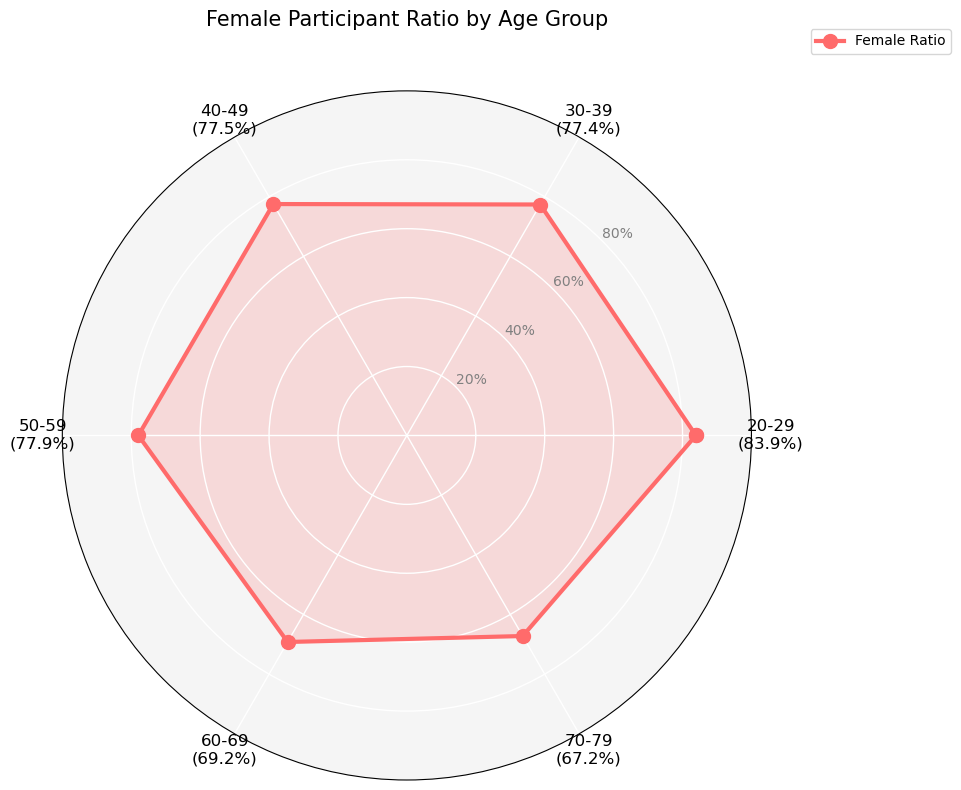

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate gender ratio by age group (explicitly set observed=False to maintain current behavior)
gender_ratio = df.groupby(['age_group', 'sex'], observed=False)['n_participants'].sum().unstack(fill_value=0)

# Calculate female ratio (add small epsilon to prevent division by zero)
epsilon = 1e-6  # Very small value
gender_ratio['female_ratio'] = gender_ratio['female'] / (gender_ratio['female'] + gender_ratio['male'] + epsilon)

# Ensure age groups are properly ordered (adjust according to your actual data)
age_order = sorted(df['age_group'].unique())  # Automatically get order
gender_ratio = gender_ratio.reindex(age_order)

# Prepare radar chart data
categories = gender_ratio.index.tolist()
N = len(categories)
angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # Close the circle

values = gender_ratio['female_ratio'].tolist()
values += values[:1]  # Close the circle

# Create more visually appealing radar chart
plt.figure(figsize=(10, 8))
ax = plt.subplot(polar=True)

# Custom colors and styles
colors = ['#FF6B6B', '#4ECDC4', '#556270']  # Red/teal/gray color scheme
ax.set_facecolor('#F5F5F5')  # Light gray background
ax.grid(color='white', linestyle='-', linewidth=1)

# Plot data (with data point markers)
ax.plot(angles, values, 'o-', linewidth=3, markersize=10, color=colors[0], label='Female Ratio')
ax.fill(angles, values, color=colors[0], alpha=0.2)

# Add labels and title
ax.set_xticks(angles[:-1])
ax.set_xticklabels([f"{age}\n({ratio:.1%})" for age, ratio in zip(categories, gender_ratio['female_ratio'])],
                  fontsize=12)

# Configure radial axis
ax.set_rlabel_position(45)
plt.yticks([0.2, 0.4, 0.6, 0.8], ["20%", "40%", "60%", "80%"], color="grey", size=10)
plt.ylim(0, 1)

# Add title and description
plt.title('Female Participant Ratio by Age Group\n', size=15, pad=30)

# Add legend and annotations
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()

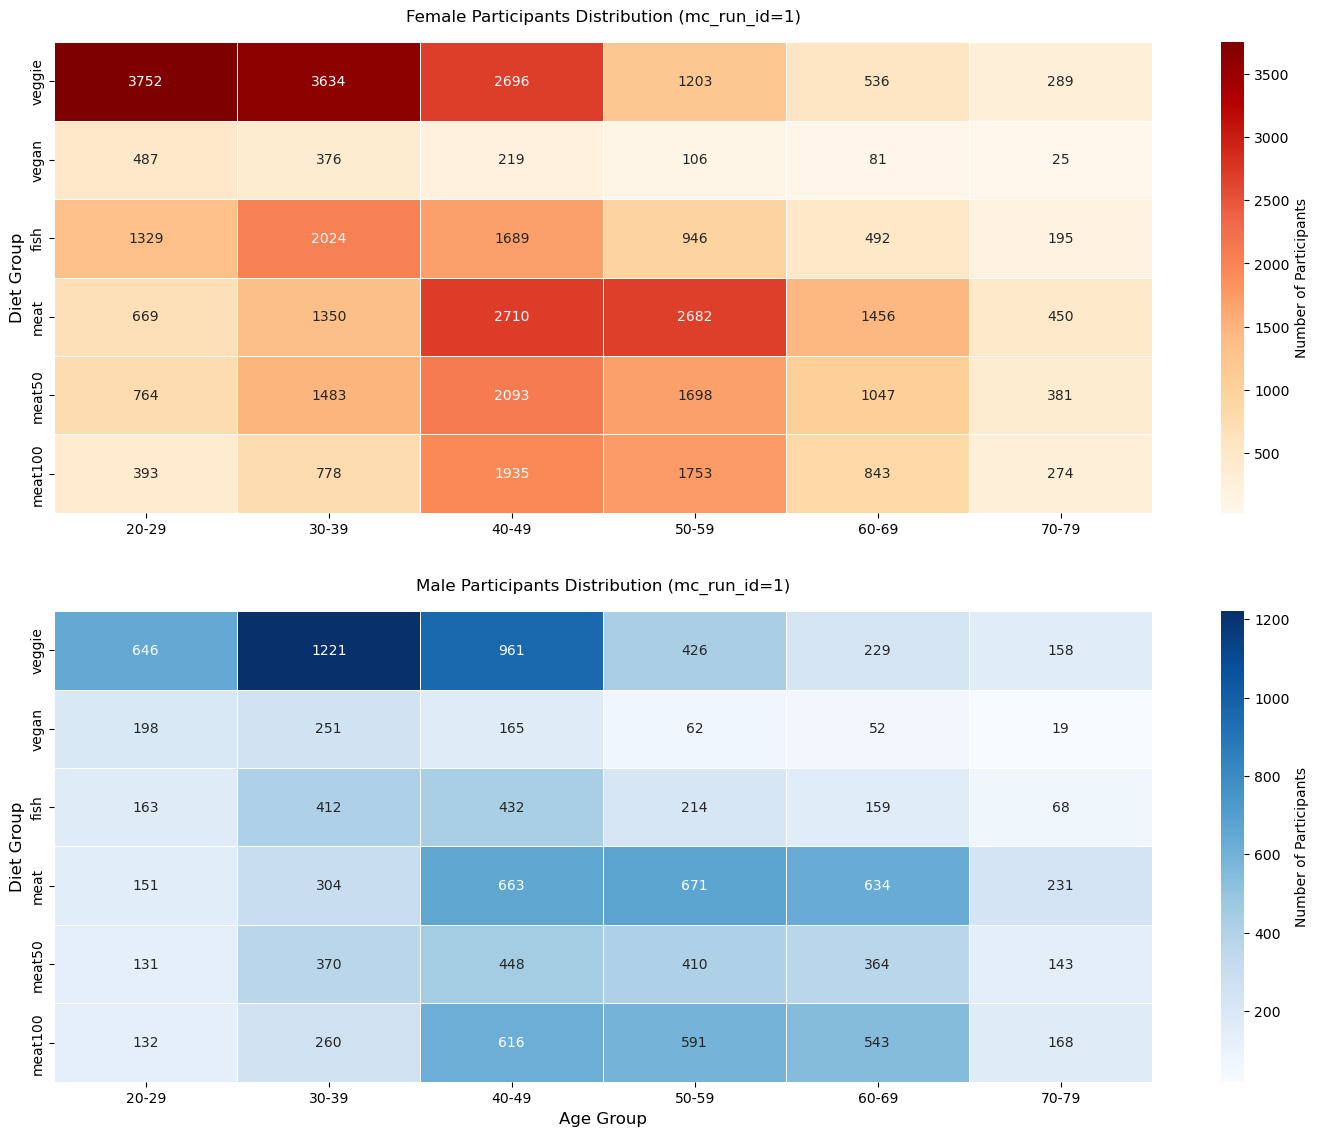

In [26]:
# Filter data for mc_run_id=1 only
df_filtered = df[df['mc_run_id'] == 1]

# Define custom sorting orders
diet_order = ['veggie', 'vegan', 'fish', 'meat', 'meat50', 'meat100']
age_order = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

# Create pivot table for female participants
female_data = df_filtered[df_filtered['sex'] == 'female'].pivot_table(
    index='diet_group',
    columns='age_group',
    values='n_participants',
    aggfunc='sum',  # Sum participants per group
    fill_value=0,   # Fill missing combinations with 0
    observed=False  # Include all category combinations
).reindex(index=diet_order, columns=age_order)  # Apply custom sorting

# Create pivot table for male participants
male_data = df_filtered[df_filtered['sex'] == 'male'].pivot_table(
    index='diet_group',
    columns='age_group',
    values='n_participants',
    aggfunc='sum',
    fill_value=0,
    observed=False
).reindex(index=diet_order, columns=age_order)

# Set up figure size and layout
plt.figure(figsize=(15, 12))  # Width: 15in, Height: 12in

# Female heatmap (top subplot)
plt.subplot(2, 1, 1)  # Position 1 in 2-row, 1-column layout
sns.heatmap(
    female_data,
    annot=True,      # Show values in cells
    fmt='.0f',       # Format as integers
    cmap='OrRd',     # Orange-Red color palette
    linewidths=0.5,  # Grid line width
    cbar_kws={'label': 'Number of Participants'},  # Colorbar label
    annot_kws={'size': 10}  # Annotation font size
)
plt.title('Female Participants Distribution (mc_run_id=1)', pad=15)
plt.xlabel('')  # No x-axis label for top plot
plt.ylabel('Diet Group', fontsize=12)

# Male heatmap (bottom subplot)
plt.subplot(2, 1, 2)  # Position 2 in 2-row, 1-column layout
sns.heatmap(
    male_data,
    annot=True,
    fmt='.0f',
    cmap='Blues',    # Blue color palette
    linewidths=0.5,
    cbar_kws={'label': 'Number of Participants'},
    annot_kws={'size': 10}
)
plt.title('Male Participants Distribution (mc_run_id=1)', pad=15)
plt.xlabel('Age Group', fontsize=12)  # X-axis label for bottom plot
plt.ylabel('Diet Group', fontsize=12)

# Adjust spacing between subplots
plt.tight_layout(pad=3.0)  # 3.0 units of padding
plt.show()

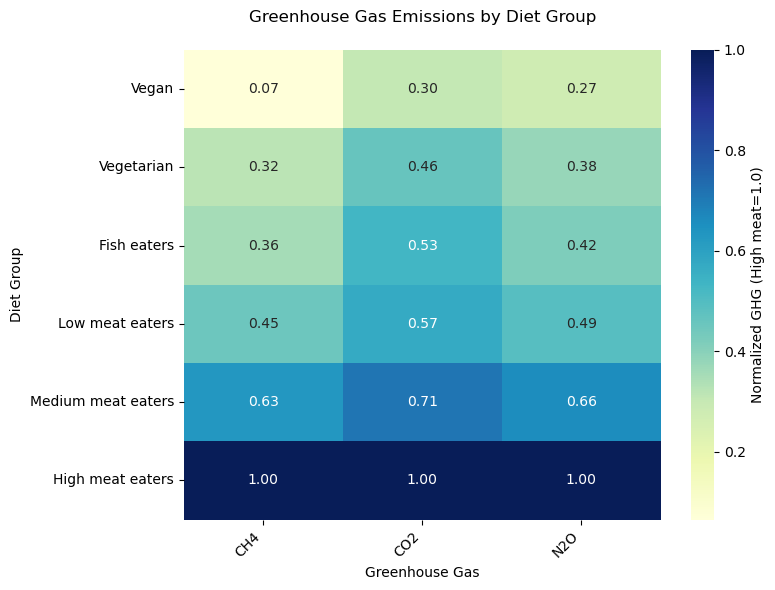

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Raw data organization - GHG emissions by diet group
# Data shows normalized greenhouse gas emissions (High meat eaters = 1.0 baseline)
data = {
    'Outcome': ['CO2', 'CO2', 'CO2', 'CO2', 'CO2', 'CO2',
                'CH4', 'CH4', 'CH4', 'CH4', 'CH4', 'CH4',
                'N2O', 'N2O', 'N2O', 'N2O', 'N2O', 'N2O'],
    'diet.group': ['Vegan', 'Vegetarian', 'Fish eaters', 'Low meat eaters', 
                  'Medium meat eaters', 'High meat eaters'] * 3,  # Each diet group appears for all three GHGs
    'median': [0.303, 0.463, 0.532, 0.572, 0.714, 1.0,  # CO2 values
              0.065, 0.320, 0.356, 0.451, 0.629, 1.0,   # CH4 values
              0.274, 0.379, 0.418, 0.491, 0.659, 1.0]   # N2O values
}

# Create DataFrame from the organized data
df = pd.DataFrame(data)

# Reshape data from long to wide format for heatmap visualization
# Pivots diet groups as rows, GHG types as columns, with median values as cell data
normalized_ghg = df.pivot(index='diet.group', columns='Outcome', values='median')

# Apply custom sorting to diet groups (from least to most meat consumption)
target_order = ['Vegan', 'Vegetarian', 'Fish eaters', 
                'Low meat eaters', 'Medium meat eaters', 'High meat eaters']
normalized_ghg = normalized_ghg.reindex(target_order)

# Create visualization
plt.figure(figsize=(8, 6))  # Set figure dimensions (width, height in inches)

# Generate heatmap with:
# - Numerical annotations in each cell (2 decimal places)
# - Blue-green color gradient (YlGnBu)
# - Color bar with descriptive label
sns.heatmap(normalized_ghg, 
            annot=True,      # Show values in cells
            fmt='.2f',      # Format values to 2 decimal places
            cmap='YlGnBu',  # Color palette (Yellow-Green-Blue)
            cbar_kws={'label': 'Normalized GHG (High meat=1.0)'},  # Colorbar label
            )

# Add chart title and axis labels
plt.title('Greenhouse Gas Emissions by Diet Group', pad=20)  # Title with padding
plt.ylabel('Diet Group')  # Y-axis label
plt.xlabel('Greenhouse Gas')  # X-axis label
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Adjust layout to prevent label clipping
plt.tight_layout()
plt.show()

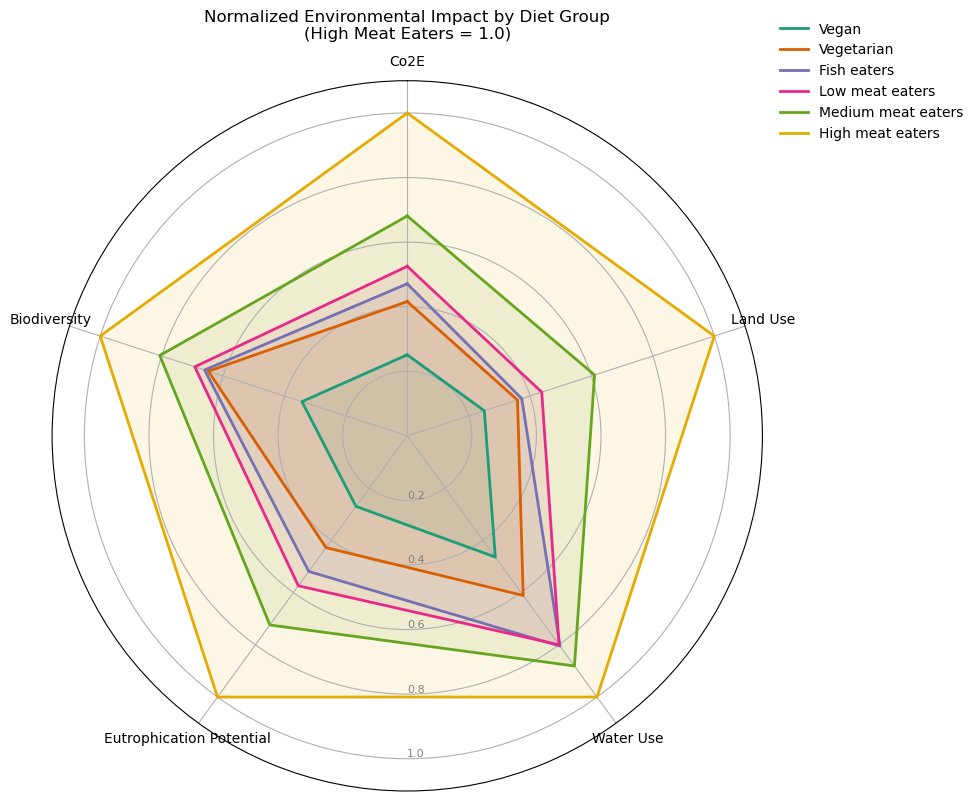

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Raw data organization - Environmental impacts by diet group
# Data shows normalized environmental impacts (High meat eaters = 1.0 baseline)
data = {
    'Outcome': ['CO2e']*6 + ['Land use']*6 + ['Water use']*6 + ['Eutrophication potential']*6 + ['Biodiversity']*6,
    'diet.group': ['Vegan', 'Vegetarian', 'Fish eaters', 'Low meat eaters', 
                  'Medium meat eaters', 'High meat eaters'] * 5,  # Each diet group appears for all five metrics
    'median': [0.251, 0.416, 0.471, 0.525, 0.681, 1.0,  # CO2e values
              0.251, 0.359, 0.373, 0.438, 0.610, 1.0,   # Land use values
              0.464, 0.611, 0.805, 0.800, 0.881, 1.0,   # Water use values
              0.270, 0.428, 0.519, 0.574, 0.724, 1.0,   # Eutrophication values
              0.343, 0.648, 0.660, 0.692, 0.806, 1.0]   # Biodiversity values
}

# Create DataFrame and reshape to wide format for radar chart
df = pd.DataFrame(data)
norm_env = df.pivot(index='diet.group', columns='Outcome', values='median')

# Define order of environmental metrics for radial axis
env_metrics = ['CO2e', 'Land use', 'Water use', 'Eutrophication potential', 'Biodiversity']

# Sort diet groups by CO2e impact (lowest to highest)
sorted_diet_groups = norm_env.sort_values(by='CO2e').index.tolist()

# Calculate angles for radar chart axes
angles = np.linspace(0, 2*np.pi, len(env_metrics), endpoint=False).tolist()
angles += angles[:1]  # Close the circle by repeating first angle

# Custom color palette for diet groups
colors = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02']  # Colorblind-friendly palette

# Create radar chart
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Plot each diet group's environmental profile
for idx, diet in enumerate(sorted_diet_groups):
    vals = norm_env.loc[diet, env_metrics].tolist()
    vals += vals[:1]  # Close the polygon by repeating first value
    ax.plot(angles, vals, color=colors[idx], linewidth=2, 
            label=diet)  # Use full diet group name in legend
    ax.fill(angles, vals, color=colors[idx], alpha=0.1)  # Add translucent fill

# Configure polar plot parameters
ax.set_theta_offset(np.pi/2)  # Rotate plot to place 0° at top
ax.set_theta_direction(-1)    # Set clockwise direction
ax.set_xticks(angles[:-1])
# Format metric labels (remove underscores and capitalize)
ax.set_xticklabels([m.replace('_', ' ').title() for m in env_metrics], size=10)

# Configure radial axis labels
ax.set_rlabel_position(180)  # Position radial labels at 180°
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"], color="grey", size=8)
plt.ylim(0, 1.1)  # Add slight buffer above max value

# Add title and legend
plt.title('Normalized Environmental Impact by Diet Group\n(High Meat Eaters = 1.0)', 
          pad=30, size=12)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), frameon=False)  # Place legend outside plot

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()